# Logistic Regression Algoritm in Scratch

In [55]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_clf = [1 if i>0.5 else 0 for i in y_predicted]
        return y_predicted_clf
    
    def _sigmoid(self, x):
        return 1 / (1+np.exp(-x))

In [41]:
# test

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

br_data = load_breast_cancer()
X = br_data.data
y = br_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lgregress = LogisticRegression()
lgregress.fit(X_train,y_train)
predicted = lgregress.predict(X_test)

def accuracy(y_true, y_predict):
    accuracy = np.sum(y_true == y_predict) / len(y_true)
    return accuracy
    
acc = accuracy(y_test, predicted)
print(acc)

0.9473684210526315


/var/folders/x9/j16jbch57gg61qsn4q91b06w0000gn/T/ipykernel_44056/3279340081.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-x))


# Feedback

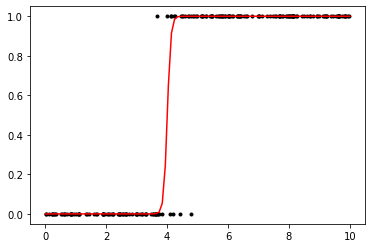

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

df_c = pd.read_csv("https://raw.githubusercontent.com/hanwoolJeong/lectureUniv/main/testData_LogisticRegression.txt", sep="\s+")

xRaw = np.array(df_c["WorkingHour"])
yRaw = np.array(df_c["PassFail"])

plt.plot(xRaw,yRaw,"k.")

#sigmoid function
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

#Negative Log-Likelihood; NLL
Ndata = len(xRaw) # we can use shape method instead
X = np.c_[np.ones([Ndata,1]),xRaw] # Design matrix ...but we can do without add 1 in each vector by using bias
y = yRaw

#Gradient Descent Method
Niteration = 200
eta = 0.1
wGD = np.array([0,0])
for iteration in range(Niteration):
    mu = sigmoid(wGD.dot(X.T))
    # convexity already guaranteed!!!
    gradients = X.T.dot(mu - y) # you have to understand how dot method work!
    wGD = wGD - eta*gradients

xTest = np.linspace(0,10,100)
xTestmatrix = np.c_[np.ones([100,1]), xTest]
plt.plot(xTest, sigmoid(wGD.dot(xTestmatrix.T)),"r-")
plt.show()
#then How can I classify three classes??? -> one by one!!

# Logistic Regression using Scikit-Learn

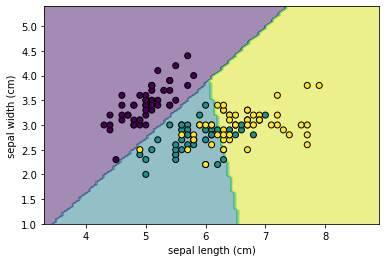

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(C=1e5)
classifier = logreg.fit(X_train, y_train)
predicted = logreg.predict(X_test)
acc = accuracy_score(y_test, predicted)

disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict", xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()